## Get wikitable from 100 Movie Quotes

- https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table
- https://stackoverflow.com/questions/15724034/how-to-convert-wikipedia-wikitable-to-python-pandas-dataframe

In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd

URL = "https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Movie_Quotes"

r = rq.get(URL)
html = r.text

soup = BeautifulSoup(html, 'html.parser')

In [2]:
table = soup.find("table", attrs={"class":"wikitable"})
tbody = table.find('tbody')
rows = tbody.find_all('tr')

In [3]:
header = [i.text.replace("\n","") for i in rows[0].find_all('th')]
header

['Rank', 'Quotation', 'Character', 'Actor/Actress', 'Film', 'Year']

In [4]:

data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

df = pd.DataFrame(data,columns=header)
df

,Rank,Quotation,Character,Actor/Actress,Film,Year
0,1,"""Frankly, my dear, I don't give a damn.""",Rhett Butler,Clark Gable,Gone with the Wind,1939
1,2,"""I'm gonna make him an offer he can't refuse.""",Vito Corleone,Marlon Brando,The Godfather,1972
2,3,"""You don't understand! I coulda had class. I c...",Terry Malloy,Marlon Brando,On the Waterfront,1954
3,4,"""Toto, I've a feeling we're not in Kansas anym...",Dorothy Gale,Judy Garland,The Wizard of Oz,1939
4,5,"""Here's looking at you, kid.""",Rick Blaine,Humphrey Bogart,Casablanca,1942
...,...,...,...,...,...,...
95,96,"""Snap out of it!""",Loretta Castorini,Cher,Moonstruck,1987
96,97,"""My mother thanks you. My father thanks you. M...",George M. Cohan,James Cagney,Yankee Doodle Dandy,1942
97,98,"""Nobody puts Baby in a corner.""",Johnny Castle,Patrick Swayze,Dirty Dancing,1987
98,99,"""I'll get you, my pretty, and your little dog ...",Wicked Witch of the West,Margaret Hamilton,The Wizard of Oz,1939


## Retrieve poster images

In [32]:
# Retrieve poster images
col1 = rows[1].find_all('td')
col1[4].a.get('href')

'/wiki/Gone_with_the_Wind_(film)'

In [40]:
wiki = "https://en.wikipedia.org/"
p = rq.get(wiki+col1[4].a.get('href')).text

soup = BeautifulSoup(p, 'html.parser')
tdimg = soup.find("td", attrs={"class":"infobox-image"})
src = tdimg.img.get("src")
src


'//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Poster_-_Gone_With_the_Wind_01.jpg/220px-Poster_-_Gone_With_the_Wind_01.jpg'

In [49]:
img = rq.get("https:"+src).content

In [50]:
from PIL import Image
from io import BytesIO
im = Image.open(BytesIO(img))
# im.show() # open image outside of the notebook

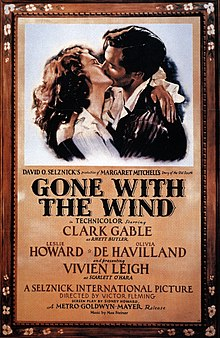

In [53]:
from IPython import display
display.Image(img)

In [59]:
# https://www.tutorialspoint.com/downloading-files-from-web-using-python
wiki = "https://en.wikipedia.org/"
for row in rows[1:]:
    cols = row.find_all('td')
    p = rq.get(wiki+cols[4].a.get('href')).text
    soup = BeautifulSoup(p, 'html.parser')
    tdimg = soup.find("td", attrs={"class":"infobox-image"})
    src = tdimg.img.get("src")
    img = rq.get("https:"+src).content
    with open("posters/"+cols[0].text.strip(),"wb") as f:
        f.write(img)

## Post-process wikipedia table 

Remove Wikipedia quotes like [3]

https://stackoverflow.com/questions/5658369/how-to-input-a-regex-in-string-replace

In [8]:
import re
q = df.Quotation[3]
line = re.sub(r"\[\d+\]","",q)
line

'"Toto, I\'ve a feeling we\'re not in Kansas anymore."'

In [62]:
for i in range(100):
    df.Film[i] = re.sub(r"\[\d+\]","",df.Film[i])

In [63]:
df.to_csv("movie_quotes_list.csv")

In [64]:
pd.read_csv("movie_quotes_list.csv",index_col="Unnamed: 0")

,Rank,Quotation,Character,Actor/Actress,Film,Year
0,1,"""Frankly, my dear, I don't give a damn.""",Rhett Butler,Clark Gable,Gone with the Wind,1939
1,2,"""I'm gonna make him an offer he can't refuse.""",Vito Corleone,Marlon Brando,The Godfather,1972
2,3,"""You don't understand! I coulda had class. I c...",Terry Malloy,Marlon Brando,On the Waterfront,1954
3,4,"""Toto, I've a feeling we're not in Kansas anym...",Dorothy Gale,Judy Garland,The Wizard of Oz,1939
4,5,"""Here's looking at you, kid.""",Rick Blaine,Humphrey Bogart,Casablanca,1942
...,...,...,...,...,...,...
95,96,"""Snap out of it!""",Loretta Castorini,Cher,Moonstruck,1987
96,97,"""My mother thanks you. My father thanks you. M...",George M. Cohan,James Cagney,Yankee Doodle Dandy,1942
97,98,"""Nobody puts Baby in a corner.""",Johnny Castle,Patrick Swayze,Dirty Dancing,1987
98,99,"""I'll get you, my pretty, and your little dog ...",Wicked Witch of the West,Margaret Hamilton,The Wizard of Oz,1939


## Retrieve quotes videos from Youtube 

In [12]:
df.Quotation[0] + " " + df.Film[0]

'"Frankly, my dear, I don\'t give a damn." Gone with the Wind'

In [13]:
from pytube import Search
s = Search(df.Quotation[0] + " " + df.Film[0])
yt = s.results[0]

Unexpected renderer encountered.
Renderer name: dict_keys(['movieRenderer'])
Search term: "Frankly, my dear, I don't give a damn." Gone with the Wind
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.


In [14]:
yt.watch_url

'https://youtube.com/watch?v=GQ5ICXMC4xY'

In [23]:
yt.streams.filter(file_extension='mp4').order_by('resolution').first()

<Stream: itag="160" mime_type="video/mp4" res="144p" fps="24fps" vcodec="avc1.4d400c" progressive="False" type="video">

In [16]:
video = yt.streams.first()
video
# video.download('downloads')

<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="12fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">

In [12]:
video.download('downloads/video_1')

'd:\\devel\\english\\downloads/video_1\\Frankly My Dear I Dont Give a Damn - Gone with the Wind (66) Movie CLIP (1939) HD.3gpp'

In [18]:
i = 89
df.Quotation[i] + " " + df.Film[i]

'"A martini. Shaken, not stirred."[30] Goldfinger[31]'

In [19]:
from pytube import YouTube

url = "https://www.youtube.com/watch?v=UUI65HYqQw0"
yt = YouTube(url)
video = yt.streams.first()
video.download('downloads/video_'+str(89))

'd:\\devel\\english\\downloads/video_89\\A martini shaken not stirred - Sean Connery - Goldfinger.3gpp'

In [25]:
for i in range(100):
    from pytube import Search
    s = Search(df.Quotation[i] + " " + df.Film[i])
    yt = s.results[0]
    video = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').first()
    video.download('downloads/video_'+str(i))

Unexpected renderer encountered.
Renderer name: dict_keys(['movieRenderer'])
Search term: "Frankly, my dear, I don't give a damn." Gone with the Wind
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['movieRenderer'])
Search term: "I'm gonna make him an offer he can't refuse." The Godfather
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['movieRenderer'])
Search term: "Toto, I've a feeling we're not in Kansas anymore." The Wizard of Oz
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['movieRenderer'])
Search term: "Here's looking at you, kid." Casablanca
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Rend